In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [5]:
pd.set_option("display.max_colwidth", 200)
DATA_DIR = "./processed_data"

train_path = os.path.join(DATA_DIR, "train.csv")
val_path = os.path.join(DATA_DIR, "val.csv")
test_path = os.path.join(DATA_DIR, "test.csv")
merged_path = os.path.join(DATA_DIR, "merged_full.csv")
meta_path = os.path.join(DATA_DIR, "metadata.json")


In [6]:
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)
merged_df = pd.read_csv(merged_path)


In [7]:
train_df.shape, val_df.shape, test_df.shape, merged_df.shape

((259050, 5), (32529, 5), (32625, 5), (324204, 11))

In [8]:
with open(meta_path, "r", encoding="utf-8") as f:
    metadata = json.load(f)
print(json.dumps(metadata, ensure_ascii=False, indent=2))

{
  "total_samples": 324204,
  "train_samples": 259050,
  "val_samples": 32529,
  "test_samples": 32625,
  "unique_posts": 6750,
  "platforms": {
    "tiktok": 266568,
    "youtube": 56493,
    "facebook": 1143
  },
  "sentiments": {
    "trung tính": 136158,
    "tích cực": 88627,
    "tự nhiên": 78338,
    "tiêu cực": 21081
  }
}


In [9]:
print("train_df columns")
print(train_df.columns)

train_df columns
Index(['input_text', 'target_text', 'post_id', 'platform', 'sentiment'], dtype='object')


In [10]:
print("\n merged_df columns ")
print(merged_df.columns)


 merged_df columns 
Index(['post_id', 'comment_text', 'sentiment_score', 'count_like', 'post_text',
       'platform', 'title', 'clean_post_text', 'clean_comment_text',
       'rank_in_post', 'sentiment_label'],
      dtype='object')


In [11]:
print("\n Preview train_df ")
display(train_df.head(5))


 Preview train_df 


,input_text,target_text,post_id,platform,sentiment
0,"Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.\nYêu cầu: 5-25 từ, trung tính, có thể dùng emoji phù hợp.\nBài đăng: Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #...",nhận ra chúg ta là npc,231921,tiktok,trung tính
1,"Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.\nYêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.\nBài đăng: Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #be...",cute zợ,231921,tiktok,tích cực
2,"Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.\nYêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.\nBài đăng: Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #be...",Ý là bả dễ thương quá bây,231921,tiktok,tích cực
3,"Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.\nYêu cầu: 5-25 từ, trung tính, có thể dùng emoji phù hợp.\nBài đăng: Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #...",Ê nhìn giống quỳnh ff v😌,231921,tiktok,trung tính
4,"Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.\nYêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.\nBài đăng: Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #be...",Xin vía cho con trai mình sau này giỏi đc như vậy,231921,tiktok,tích cực


In [12]:
print("\n Preview merged_df ")
display(merged_df.head(5))


 Preview merged_df 


,post_id,comment_text,sentiment_score,count_like,post_text,platform,title,clean_post_text,clean_comment_text,rank_in_post,sentiment_label
0,231921,nhận ra chúg ta là npc,2,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,nhận ra chúg ta là npc,0,trung tính
1,231921,cute zợ,1,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,cute zợ,1,tích cực
2,231921,Ý là bả dễ thương quá bây,1,1,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Ý là bả dễ thương quá bây,2,tích cực
3,231921,Ê nhìn giống quỳnh ff v😌,2,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Ê nhìn giống quỳnh ff v😌,3,trung tính
4,231921,Xin vía cho con trai mình sau này giỏi đc như vậy,1,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Xin vía cho con trai mình sau này giỏi đc như vậy,4,tích cực


In [13]:
def add_length_features(df, post_col="clean_post_text", comment_col="clean_comment_text"):
    # Đề phòng missing
    df[post_col] = df[post_col].fillna("").astype(str)
    df[comment_col] = df[comment_col].fillna("").astype(str)
    
    df["post_char_len"] = df[post_col].str.len()
    df["comment_char_len"] = df[comment_col].str.len()
    df["post_word_len"] = df[post_col].str.split().str.len()
    df["comment_word_len"] = df[comment_col].str.split().str.len()
    return df

merged_df = add_length_features(merged_df)

print("✅ Đã thêm các cột độ dài vào merged_df")
display(merged_df[[
    "post_id", "platform", "sentiment_label",
    "post_char_len", "comment_char_len",
    "post_word_len", "comment_word_len"
]].head(5))


✅ Đã thêm các cột độ dài vào merged_df


,post_id,platform,sentiment_label,post_char_len,comment_char_len,post_word_len,comment_word_len
0,231921,tiktok,trung tính,64,22,10,6
1,231921,tiktok,tích cực,64,7,10,2
2,231921,tiktok,tích cực,64,25,10,7
3,231921,tiktok,trung tính,64,24,10,6
4,231921,tiktok,tích cực,64,49,10,12


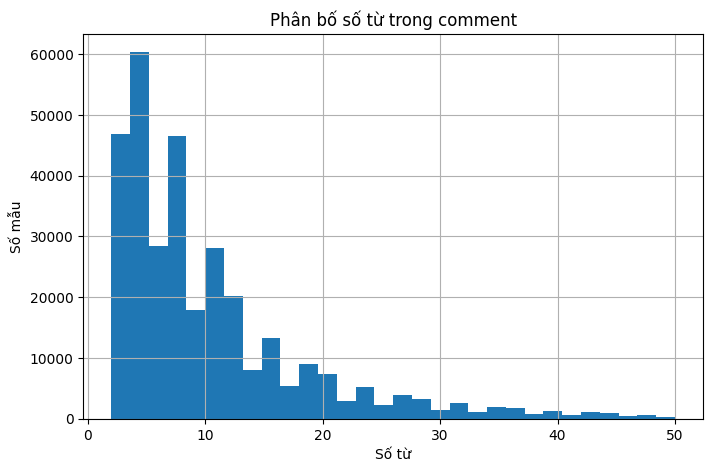

In [14]:

plt.figure(figsize=(8, 5))
merged_df["comment_word_len"].hist(bins=30)
plt.title("Phân bố số từ trong comment")
plt.xlabel("Số từ")
plt.ylabel("Số mẫu")
plt.show()



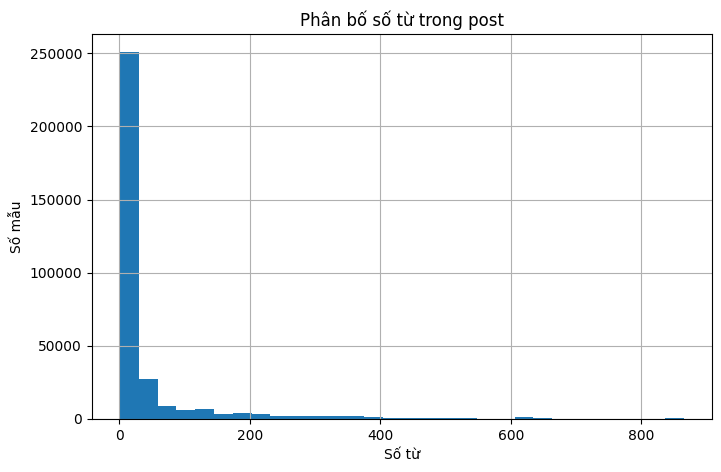

In [15]:
plt.figure(figsize=(8, 5))
merged_df["post_word_len"].hist(bins=30)
plt.title("Phân bố số từ trong post")
plt.xlabel("Số từ")
plt.ylabel("Số mẫu")
plt.show()

In [16]:
length_stats = merged_df[["post_char_len", "comment_char_len", "post_word_len", "comment_word_len"]].describe()
print("Thống kê độ dài (chars + words)")
display(length_stats)

Thống kê độ dài (chars + words)


,post_char_len,comment_char_len,post_word_len,comment_word_len
count,324204.000000,324204.000000,324204.000000,324204.000000
mean,234.455522,41.657154,44.322328,10.304746
std,409.340882,35.700384,85.812883,8.423188
min,21.000000,5.000000,1.000000,2.000000
25%,77.000000,18.000000,12.000000,5.000000
50%,111.000000,30.000000,18.000000,8.000000
75%,164.000000,52.000000,27.000000,13.000000
max,4404.000000,200.000000,865.000000,50.000000


### Phân bố Sentiment

In [17]:
sent_dist = merged_df["sentiment_label"].value_counts().sort_index()
print("Phân bố sentiment ")
print(sent_dist)

Phân bố sentiment 
sentiment_label
tiêu cực       21081
trung tính    136158
tích cực       88627
tự nhiên       78338
Name: count, dtype: int64


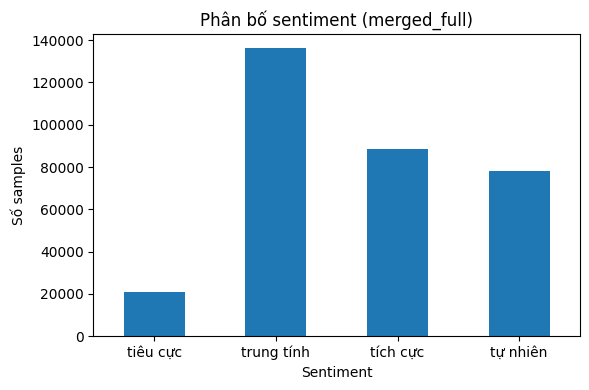

In [18]:
plt.figure(figsize=(6, 4))
sent_dist.plot(kind="bar")
plt.title("Phân bố sentiment (merged_full)")
plt.xlabel("Sentiment")
plt.ylabel("Số samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### phân bố sentiment theo **train/val/test**

In [19]:

def sentiment_distribution_by_split(df, split_name):
    return df["sentiment"].value_counts().rename(split_name)

train_sent = sentiment_distribution_by_split(train_df, "train")
val_sent = sentiment_distribution_by_split(val_df, "val")
test_sent = sentiment_distribution_by_split(test_df, "test")

sent_split_df = pd.concat([train_sent, val_sent, test_sent], axis=1).fillna(0).astype(int)
print("phân bố sentiment theo split")
display(sent_split_df)

phân bố sentiment theo split


,train,val,test
sentiment,,,
trung tính,108255,14040,13863
tích cực,71076,8582,8969
tự nhiên,63026,7683,7629
tiêu cực,16693,2224,2164


<Figure size 700x500 with 0 Axes>

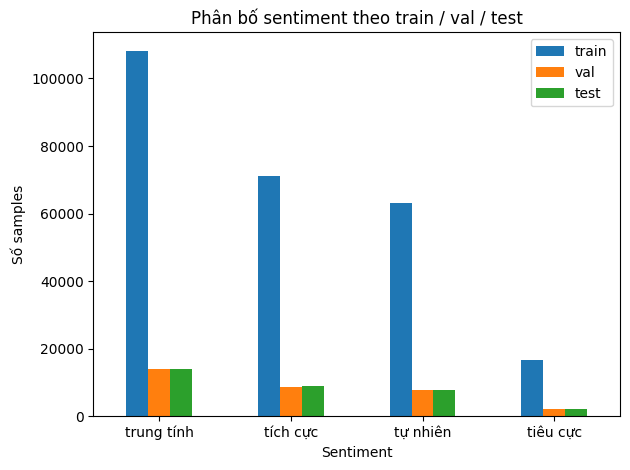

In [20]:
plt.figure(figsize=(7, 5))
sent_split_df.plot(kind="bar")
plt.title("Phân bố sentiment theo train / val / test")
plt.xlabel("Sentiment")
plt.ylabel("Số samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### số lượng mẫu theo nền tảng

Phân bố platform
platform
tiktok     266568
youtube     56493
Name: count, dtype: int64


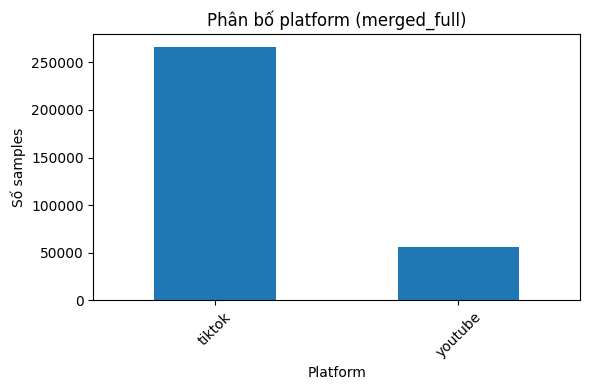

In [21]:
plat_dist = merged_df["platform"].value_counts()
plat_dist = plat_dist[plat_dist.index != "facebook"]
print("Phân bố platform")
print(plat_dist)

plt.figure(figsize=(6, 4))
plat_dist.plot(kind="bar")
plt.title("Phân bố platform (merged_full)")
plt.xlabel("Platform")
plt.ylabel("Số samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### phân bố cảm xúc nền tảng

Số lượng sample theo (platform, sentiment_label)


sentiment_label,tiêu cực,trung tính,tích cực,tự nhiên
platform,,,,
tiktok,14124,118036,72803,61605
youtube,6740,17715,15345,16693


<Figure size 800x500 with 0 Axes>

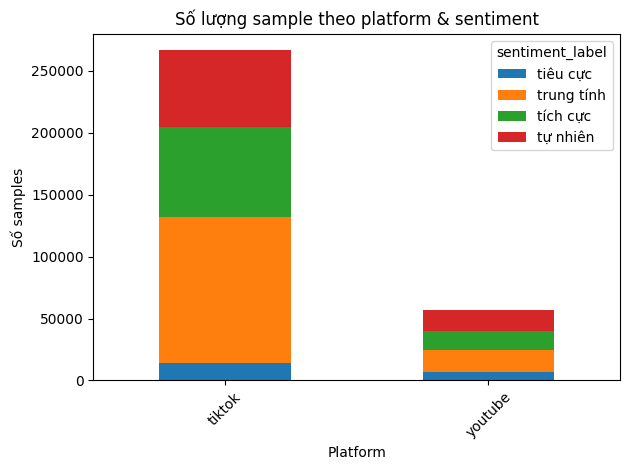

In [22]:
pivot_plat_sent = pd.pivot_table(
    merged_df,
    index="platform",
    columns="sentiment_label",
    values="post_id",
    aggfunc="count",
    fill_value=0
)

print("Số lượng sample theo (platform, sentiment_label)")
pivot_plat_sent = pivot_plat_sent[pivot_plat_sent.index != "facebook"]
display(pivot_plat_sent)

plt.figure(figsize=(8, 5))
pivot_plat_sent.plot(kind="bar", stacked=True)
plt.title("Số lượng sample theo platform & sentiment")
plt.xlabel("Platform")
plt.ylabel("Số samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Kích thước dataset ===
train: 259,050 samples
val: 32,529 samples
test: 32,625 samples


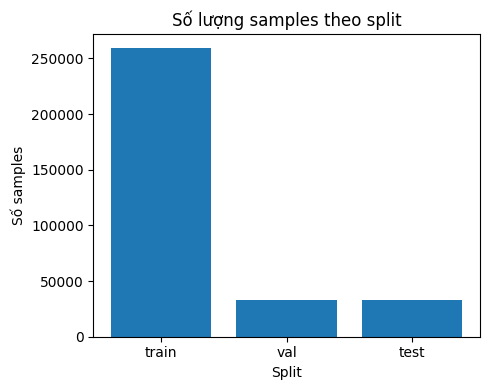

Thống kê số comment/post


count    6750.000000
mean       48.030222
std         6.081165
min         1.000000
25%        50.000000
50%        50.000000
75%        50.000000
max        50.000000
Name: clean_comment_text, dtype: float64

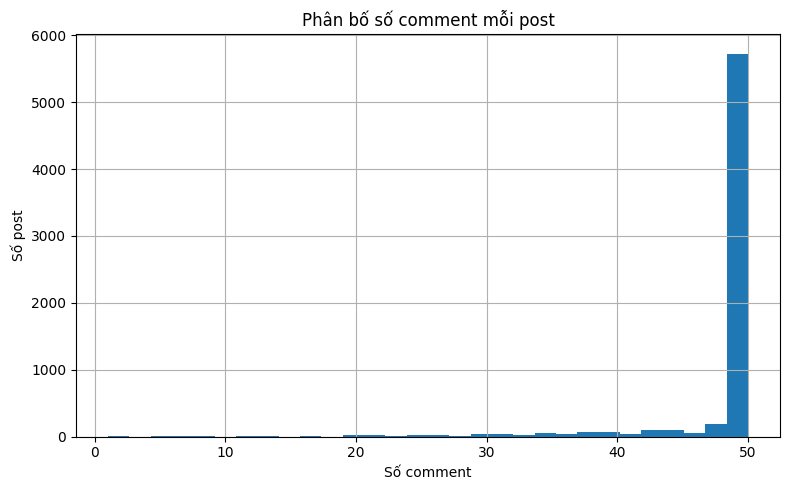

In [23]:


# %% [markdown]
# ## 7️⃣ Số lượng samples train / val / test
# 
# Kiểm tra lại kích thước các tập sau khi split theo `post_id`.

# %%
sizes = {
    "train": len(train_df),
    "val": len(val_df),
    "test": len(test_df),
}

print("=== Kích thước dataset ===")
for k, v in sizes.items():
    print(f"{k}: {v:,} samples")

plt.figure(figsize=(5, 4))
plt.bar(list(sizes.keys()), list(sizes.values()))
plt.title("Số lượng samples theo split")
plt.xlabel("Split")
plt.ylabel("Số samples")
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8️⃣ Thống kê số comment mỗi post
# 
# Từ `merged_full`, ta xem:
# - Số comment/post sau khi giới hạn tối đa 50
# - Phân bố số comment/post

# %%
comments_per_post = merged_df.groupby("post_id")["clean_comment_text"].count()
print("Thống kê số comment/post")
display(comments_per_post.describe())

plt.figure(figsize=(8, 5))
comments_per_post.hist(bins=30)
plt.title("Phân bố số comment mỗi post")
plt.xlabel("Số comment")
plt.ylabel("Số post")
plt.tight_layout()
plt.show()

✅ count_like có trong merged_df, chạy phân tích...


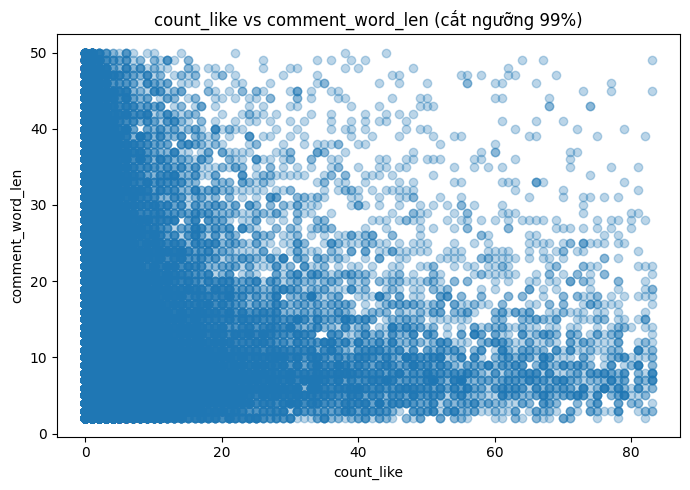

Hệ số tương quan (Pearson) giữa count_like và comment_word_len: 0.0586


In [24]:


# %% [markdown]
# ## 9️⃣ Ảnh hưởng của `count_like` đến độ dài comment (optional)
# 
# Nếu cột `count_like` tồn tại, ta có thể xem tương quan tương đối giữa:
# - `count_like` và `comment_word_len`

if "count_like" in merged_df.columns:
    print("✅ count_like có trong merged_df, chạy phân tích...")

    # Lọc outliers cho trực quan: chỉ lấy những comment có like < percentile 99
    threshold = merged_df["count_like"].quantile(0.99)
    sub_df = merged_df[merged_df["count_like"] <= threshold]

    plt.figure(figsize=(7, 5))
    plt.scatter(sub_df["count_like"], sub_df["comment_word_len"], alpha=0.3)
    plt.title("count_like vs comment_word_len (cắt ngưỡng 99%)")
    plt.xlabel("count_like")
    plt.ylabel("comment_word_len")
    plt.tight_layout()
    plt.show()

    corr = sub_df[["count_like", "comment_word_len"]].corr().iloc[0, 1]
    print(f"Hệ số tương quan (Pearson) giữa count_like và comment_word_len: {corr:.4f}")
else:
    print("⚠️ Không tìm thấy cột count_like trong merged_df, bỏ qua cell này.")


In [25]:
def show_samples(df, n=5, title="Samples"):
    print(f"\n{title} ")
    sample_df = df.sample(min(n, len(df)), random_state=42)
    for i, row in sample_df.iterrows():
        print(f"\nSample index: {i}")
        print(f"[Platform] {row.get('platform', 'N/A')} | [Sentiment] {row.get('sentiment', 'N/A')}")
        print("\n[INPUT]")
        print(row["input_text"])
        print("\n[TARGET]")
        print(row["target_text"])
        print("-" * 80)

show_samples(train_df, n=5, title="Train samples")




Train samples 

Sample index: 120144
[Platform] tiktok | [Sentiment] tích cực

[INPUT]
Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.
Yêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.
Bài đăng: Hoa hậu Thuỳ Tiên bất ngờ xuất hiện hỗ trợ tiết mục Nỗi Đau Ngây Dại #VieON #VieONShow #anhtrai #anhtraisayhi #tiktokgiaitri #tvshowhay
Bình luận:

[TARGET]
Bả đẹp mê hồn kh lối thoát luôn
--------------------------------------------------------------------------------

Sample index: 224020
[Platform] tiktok | [Sentiment] tích cực

[INPUT]
Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.
Yêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.
Bài đăng: Official Trailer ATSH Movie 2 Ngày Ta Chưa Biết Tên #VieON #AnhTraiSayHi #AnhTraiSayHiConcert #tiktokgiaitri #tvshowhay #tiktoksoiphim #DatVietVAC
Bình luận:

[TARGET]
ra nhanh nhanh vie ơi e hónggg😭
------------------------------------------------------------------------------

In [26]:
for s in ["tích cực", "trung tính", "tiêu cực", "tự nhiên"]:
    subset = train_df[train_df["sentiment"] == s]
    if len(subset) == 0:
        continue
    show_samples(subset, n=2, title=f"Samples sentiment = {s}")



Samples sentiment = tích cực 

Sample index: 211063
[Platform] tiktok | [Sentiment] tích cực

[INPUT]
Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.
Yêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.
Bài đăng: Relax thật sự 😂😂😂#tuantudo #quannhautudo #vtmgr #learnontiktok
Bình luận:

[TARGET]
Tuyệt vời! Thik theo dõi a . Mong 1 ngày tới quán dc gặp ông chủ
--------------------------------------------------------------------------------

Sample index: 178930
[Platform] tiktok | [Sentiment] tích cực

[INPUT]
Nhiệm vụ: Viết bình luận ngắn gọn, tự nhiên bằng tiếng Việt cho bài đăng tiktok.
Yêu cầu: 5-25 từ, tích cực, có thể dùng emoji phù hợp.
Bài đăng: Shark Bình từng nhận định về thị trường xe điện thế nào? #Hongkinhte #Hong
Bình luận:

[TARGET]
Chỉ có shark bình nói là không có ai mua xe của em đâu, chứ tôi vẫn thấy ng ta mua xe này nhiều mà
--------------------------------------------------------------------------------

Samples sentiment = trung 

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hoduy\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [28]:
from wordcloud import WordCloud

In [33]:
# %% [markdown]
# # Word Count & Visualization (gọn)
# Dùng pandas đọc dữ liệu + matplotlib để vẽ biểu đồ

# %%
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file đã xử lý
df = pd.read_csv("./processed_data/merged_full.csv")

print(df.shape)
df.head()


(324204, 11)


,post_id,comment_text,sentiment_score,count_like,post_text,platform,title,clean_post_text,clean_comment_text,rank_in_post,sentiment_label
0,231921,nhận ra chúg ta là npc,2,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,nhận ra chúg ta là npc,0,trung tính
1,231921,cute zợ,1,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,cute zợ,1,tích cực
2,231921,Ý là bả dễ thương quá bây,1,1,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Ý là bả dễ thương quá bây,2,tích cực
3,231921,Ê nhìn giống quỳnh ff v😌,2,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Ê nhìn giống quỳnh ff v😌,3,trung tính
4,231921,Xin vía cho con trai mình sau này giỏi đc như vậy,1,0,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,tiktok,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Hẳn bạn phải suy nghĩ nhiều lắm #beatnetwork #beatvn #beatoflife,Xin vía cho con trai mình sau này giỏi đc như vậy,4,tích cực


In [ ]:
assert "clean_comment_text" in df.columns
comments = df["clean_comment_text"].fillna("").str.lower()
tokens_series = comments.str.split()
tokens = tokens_series.explode()
tokens = tokens[tokens != ""]
word_counts = tokens.value_counts()
word_counts.head(20)

clean_comment_text
có       45555
là       35981
mà       27914
anh      26877
xe       26708
thì      25881
a        25784
ko       25209
này      25086
đi       24879
cho      22086
ạ        21828
em       20383
quá      20272
làm      19518
không    18187
cũng     16175
mình     16142
k        15532
của      15044
Name: count, dtype: int64

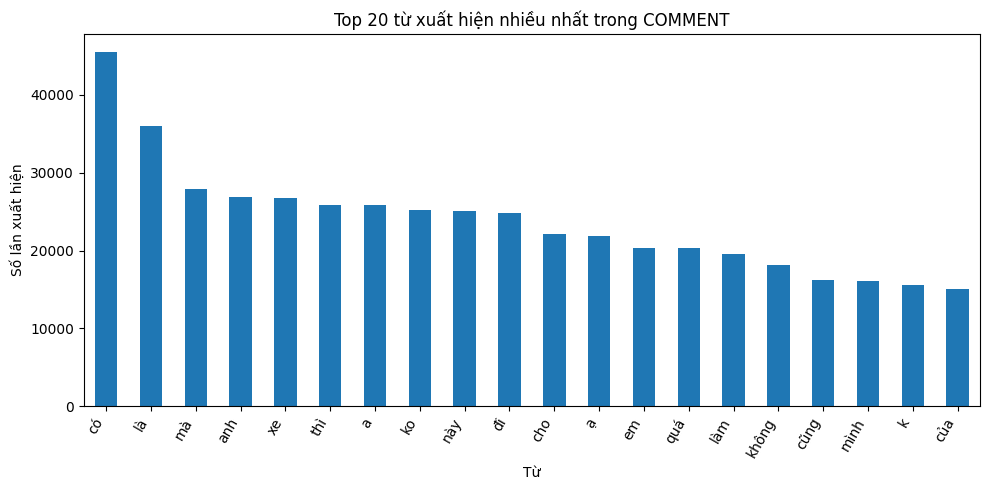

In [38]:

top_n = 20
top_words = word_counts.head(top_n)

plt.figure(figsize=(10, 5))
top_words.plot(kind="bar")
plt.title(f"Top {top_n} từ xuất hiện nhiều nhất trong COMMENT")
plt.xlabel("Từ")
plt.ylabel("Số lần xuất hiện")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()


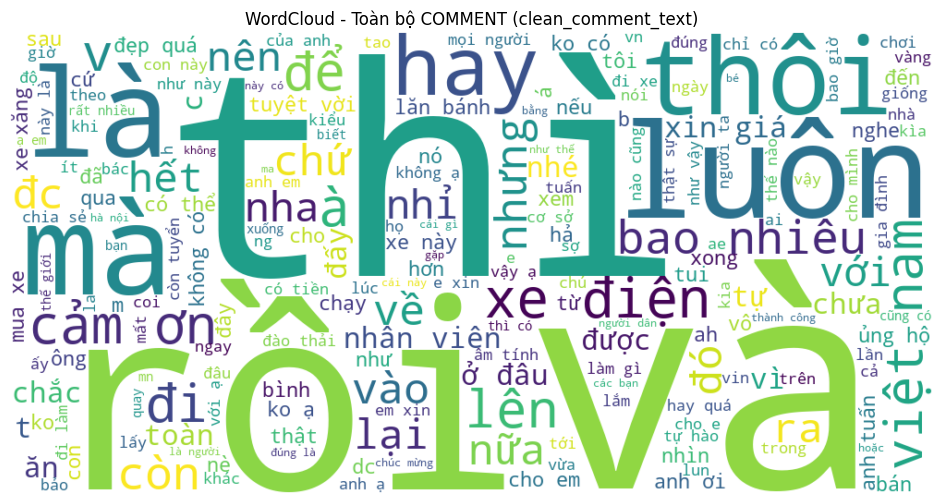

In [ ]:
full_text = " ".join(comments.tolist())

wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=200,
).generate(full_text)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Toàn bộ COMMENT (clean_comment_text)")
plt.show()

In [ ]:
# # %% [markdown]
# # ## 4. Xem các từ xuất hiện rất ít (vd: đúng 1 lần)

# # %%
# rare_words = word_counts[word_counts == 1]

# print(f"Tổng số từ chỉ xuất hiện đúng 1 lần: {len(rare_words)}")
# rare_words.head(50)
